In [3]:
from mechanism import *
import numpy as np
import matplotlib.pyplot as plt

# Declare the joints that make up the system.
O, A, B, C = get_joints('O A B C')

# Declare the vectors and keep in mind that angles are in radians and start from the positive x-axis.
a = Vector((O, A), r=5)
b = Vector((A, B), r=8)
c = Vector((O, C), r=8, theta=0, style='ground')
d = Vector((C, B), r=9)

In [4]:
# Define the known input to the system.
# For a 500 RMP crank, the time it takes to rotate one rev is 0.12s
time = np.linspace(0, 0.12, 300)
angular_velocity = 50*np.pi/3  # This is 500 RPM in rad/s

theta = angular_velocity*time  # Integrate to find the theta
omega = np.full((time.size,), angular_velocity)  # Just an array of the same angular velocity
alpha = np.zeros(time.size)

# Guess the unknowns, those numbers seems random initial guess
pos_guess = np.deg2rad([45, 90])
vel_guess = np.array([1000, 1000])
acc_guess = np.array([1000, 1000])

In [5]:
# Define the loop equation(s)
def loop(x, i):
    return a(i) + b(x[0]) - c() - d(x[1])


# Create the mechanism object
mechanism = Mechanism(vectors=(a, b, c, d), origin=O, loops=loop, pos=theta, vel=omega, acc=alpha,
                      guess=(pos_guess, vel_guess, acc_guess))

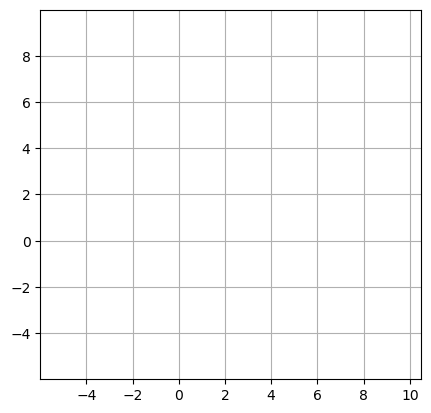

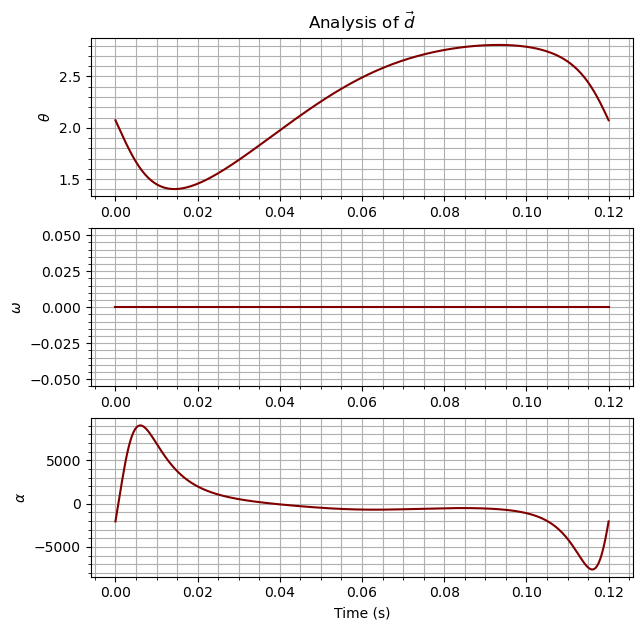

In [7]:
# Call mechanism.iterate() then get and show the animation
mechanism.iterate()
ani, fig_, ax_ = mechanism.get_animation()

# Plot the angles, angular velocity, and angular acceleration of vector d
fig, ax = plt.subplots(nrows=3, ncols=1)
ax[0].plot(time, d.pos.thetas, color='maroon') #angles (position)
ax[1].plot(time, d.vel.omega, color='maroon')  #angular velocity (not translational vel r_dots)
ax[2].plot(time, d.acc.alphas, color='maroon') #angular acceleration (not translational acc r_ddots)

ax[0].set_ylabel(r'$\theta$')
ax[1].set_ylabel(r'$\omega$')
ax[2].set_ylabel(r'$\alpha$')

ax[2].set_xlabel(r'Time (s)')
ax[0].set_title(r'Analysis of $\vec{d}$')

for a in (ax[0], ax[1], ax[2]):
    a.minorticks_on()
    a.grid(which='both')

fig.set_size_inches(7, 7)
# fig.savefig('../images/analysis_d.png')

plt.show()